# Results

## Contour Compatibility

### Corpus

Conser's Aeschylus: **80.2%** compatibility.

For Aristophanes: ≈ **82.0**!

In [ ]:
from src.comp import compatibility_corpus, compatibility_ratios_to_stats

all_sets = compatibility_corpus('data/compiled/')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Total compatibility: {total_comp}')
print(all_sets)


#### By Position (Sedes)

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from src.comp import compatibility_corpus, compatibility_ratios_to_stats

def average_by_index(nested):
    # Flatten to get all innermost lists (depth 4)
    def collect_lists(x):
        if isinstance(x, list) and all(isinstance(i, (int, float)) for i in x):
            return [x]
        elif isinstance(x, list):
            result = []
            for item in x:
                result.extend(collect_lists(item))
            return result
        return []

    all_lists = collect_lists(nested)

    # Collect values per index
    sums = defaultdict(float)
    counts = defaultdict(int)

    for lst in all_lists:
        for i, val in enumerate(lst):
            sums[i] += val
            counts[i] += 1

    max_index = max(sums.keys(), default=-1)
    averages = [(sums[i] / counts[i]) if counts[i] > 0 else None for i in range(max_index + 1)]

    return averages

all_sets = compatibility_corpus('data/compiled/')

average_by_position = average_by_index(all_sets)

rounded = [round(x, 2) if x is not None else None for x in average_by_position]
print(f'Average by position (out of {len(rounded)}): {rounded}')

def linear_regression_plays(data, title):
    # Convert string keys to numerical indices
    x = list(range(len(data)))  # or use: list(enumerate(data))[i][0] if needed
    y = data
    labels = x

    # Linear regression
    slope, intercept, *_ = linregress(x, y)
    regression_line = [slope * xi + intercept for xi in x]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x, regression_line, label=f'Fit: y = {slope:.5f}x + {intercept:.2f}', color='red')

    # Replace x-axis ticks with original labels
    plt.xticks(ticks=x, labels=labels)
    plt.xlabel('Key')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    ### Polynomial regression with numpy

    # Data
    x = np.array(x)  # ensure numpy array
    y = np.array(y)

    # Polynomial regression of degree 2 (quadratic)
    degree = 2
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)

    # Regression line
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = poly(x_fit)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x_fit, y_fit, label=f'Poly fit (deg {degree}): {poly}', color='red')
    plt.legend()
    plt.show()

    ### Polynomial regression with sklearn

    # Transform to polynomial features
    degree = 3
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x[:, np.newaxis], y)

    # Prediction
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = model.predict(x_fit[:, np.newaxis])

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x_fit, y_fit, label=f'Poly fit (deg {degree})', color='green')
    plt.legend()
    plt.show()

linear_regression_plays(average_by_position[:37], 'Compatibility by syllable position (sedes) in verse line')

### Play

	ach:	0.8179916317991632
	eq:	0.8139367816091954
	nu:	0.82
	v:	0.817450495049505
	pax:	0.82531328320802
	av:	0.817295188556567
	lys:	0.8303571428571429
	th:	0.812807881773399
	ra:	0.8106603023070803
	ec:	0.8257142857142857
	pl:	0.8900709219858156


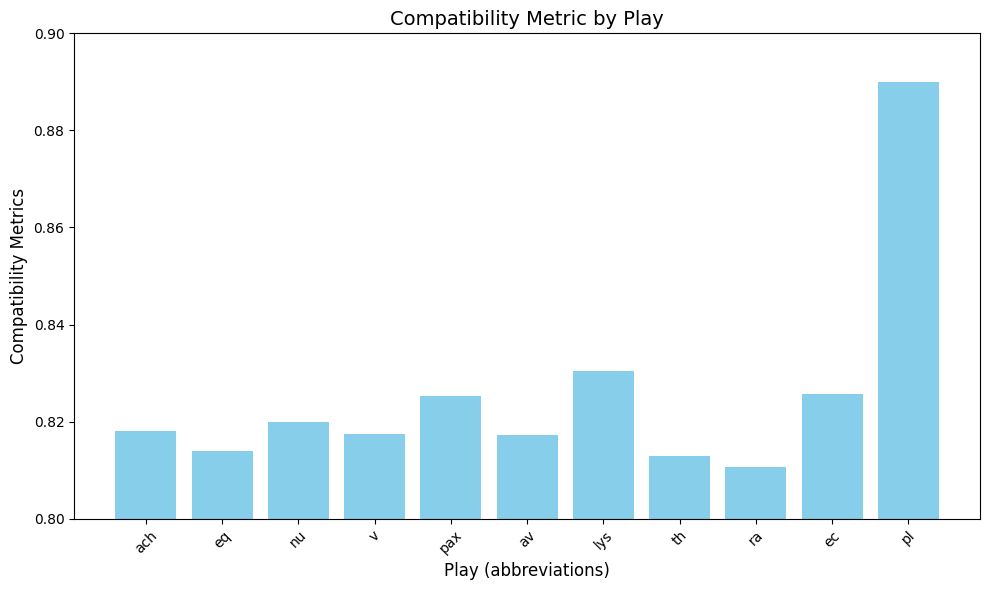

In [2]:
from src.comp import compatibility_play, compatibility_ratios_to_stats
from src.plot.plot import plot_dict
from src.utils.utils import abbreviations

def prepare_compatibility_stat(abbreviation):
    list = compatibility_play(f'data/compiled/responsion_{abbreviation}_compiled.xml')
    return compatibility_ratios_to_stats(list)

play_dict = {}
for play in abbreviations:
    play_dict[play] = prepare_compatibility_stat(play)
    print(f'\t{play}:\t{play_dict[play]}')

plot_dict(play_dict, y_start=0.8, y_end=0.9)




There is a weak linear correlation, but if we exclude Plutus the slope decreases by a full order of magnitude.

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def linear_regression_plays(data, title):
    # Convert string keys to numerical indices
    x = list(range(len(data)))  # or use: list(enumerate(data))[i][0] if needed
    y = list(data.values())
    labels = list(data.keys())

    # Linear regression
    slope, intercept, *_ = linregress(x, y)
    regression_line = [slope * xi + intercept for xi in x]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x, regression_line, label=f'Fit: y = {slope:.5f}x + {intercept:.2f}', color='red')

    # Replace x-axis ticks with original labels
    plt.xticks(ticks=x, labels=labels)
    plt.xlabel('Key')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example dict with string keys
data = play_dict
linear_regression_plays(data, 'Linear Regression of Play Compatibility')

data = {k: v for k, v in data.items() if k != 'pl'}
linear_regression_plays(data, 'Linear Regression of Play Compatibility (Excl. Plutus)')



### Intra-Play Arcs

### Canticum

In [ ]:
from src.comp import compatibility_canticum, compatibility_ratios_to_stats
from src.plot.plot_cantica import plot_dict
from src.plot.plot_2d import plot_dict_as_points
from src.utils.utils import abbreviations, get_canticum_ids, get_syll_count

def prepare_compatibility_stat_canticum(canticum_id):
    list = compatibility_canticum(f'data/compiled/responsion_{canticum_id[:-2]}_compiled.xml', canticum_id)
    return compatibility_ratios_to_stats(list)

canticum_ids = get_canticum_ids(abbreviations)
syll_counts = get_syll_count(canticum_ids)

canticum_dict = {}
for canticum_id in canticum_ids:
    canticum_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

print("Number of cantica:", len(canticum_ids))
plot_dict(canticum_dict, y_start=0.6, y_end=1)
plot_dict_as_points(canticum_dict, syll_counts, y_start=0.6, y_end=1)




#### By Strophicity

In [ ]:
from src.comp import compatibility_canticum, compatibility_ratios_to_stats, compatibility_strophicity
from src.plot.plot_cantica import plot_dict
from src.plot.plot_2d import plot_dict_as_points
from src.utils.utils import abbreviations, get_canticum_ids, get_strophicity, get_syll_count

def prepare_compatibility_stat_canticum(canticum_id):
    list = compatibility_canticum(f'data/compiled/responsion_{canticum_id[:-2]}_compiled.xml', canticum_id)
    return compatibility_ratios_to_stats(list)

antistrophic_stat = compatibility_ratios_to_stats(compatibility_strophicity(f'data/compiled', mode="antistrophic"))
polystrophic_stat = compatibility_ratios_to_stats(compatibility_strophicity(f'data/compiled', mode="polystrophic"))
print(f'Antistrophic compatibility: {antistrophic_stat}')
print(f'Polystrophic compatibility: {polystrophic_stat}')

polystrophic_ids, antistrophic_ids = get_strophicity(abbreviations)
syll_counts_polystrophic = get_syll_count(polystrophic_ids)
syll_counts_antistrophic = get_syll_count(antistrophic_ids)

polystrophic_dict = {}
for canticum_id in polystrophic_ids:
    polystrophic_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

antistrophic_dict = {}
for canticum_id in antistrophic_ids:
    antistrophic_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

plot_dict(polystrophic_dict, y_start=0.6, y_end=1)


## Accentual Responsion

### Corpus

### Play

### Canticum

To get an individual song, use the following:

In [1]:
from src.stats import accentual_responsion_metric_canticum

responsion_metric_ach = accentual_responsion_metric_canticum(f'data/compiled/responsion_ach_compiled.xml', 'ach01')

print(f'Accentual responsion metric for Acharnians: {responsion_metric_ach}')

Accentual responsion metric for Acharnians: {'acute': 0.2903225806451613, 'grave': 0.14814814814814814, 'circumflex': 0.25, 'acute_circumflex': 0.2765957446808511}


Or to tabulate all of them, and make some nice plots:

Number of cantica: 78
| Canticum   | Acute           | Grave          | Circumflex     | Acute + Circumflex   |
|------------|-----------------|----------------|----------------|----------------------|
| ach01      | 18 / 62 = 0.29  | 4 / 27 = 0.15  | 8 / 32 = 0.25  | 26 / 94 = 0.28       |
| ach02      | 18 / 56 = 0.32  | 4 / 19 = 0.21  | 4 / 19 = 0.21  | 22 / 75 = 0.29       |
| ach03      | 12 / 31 = 0.39  | 0 / 11 = 0.00  | 6 / 12 = 0.50  | 18 / 43 = 0.42       |
| ach04      | 10 / 41 = 0.24  | 0 / 25 = 0.00  | 8 / 18 = 0.44  | 18 / 59 = 0.31       |
| ach05      | 0 / 28 = 0.00   | 0 / 12 = 0.00  | 0 / 16 = 0.00  | 0 / 44 = 0.00        |
| ach06      | 24 / 49 = 0.49  | 4 / 17 = 0.24  | 2 / 17 = 0.12  | 26 / 66 = 0.39       |
| ach07      | 26 / 101 = 0.26 | 4 / 44 = 0.09  | 10 / 33 = 0.30 | 36 / 134 = 0.27      |
| ach08      | 12 / 27 = 0.44  | 0 / 15 = 0.00  | 4 / 24 = 0.17  | 16 / 51 = 0.31       |
| ach09      | 16 / 50 = 0.32  | 0 / 17 = 0.00  | 2 / 15 = 0.13  | 18 / 65 = 0

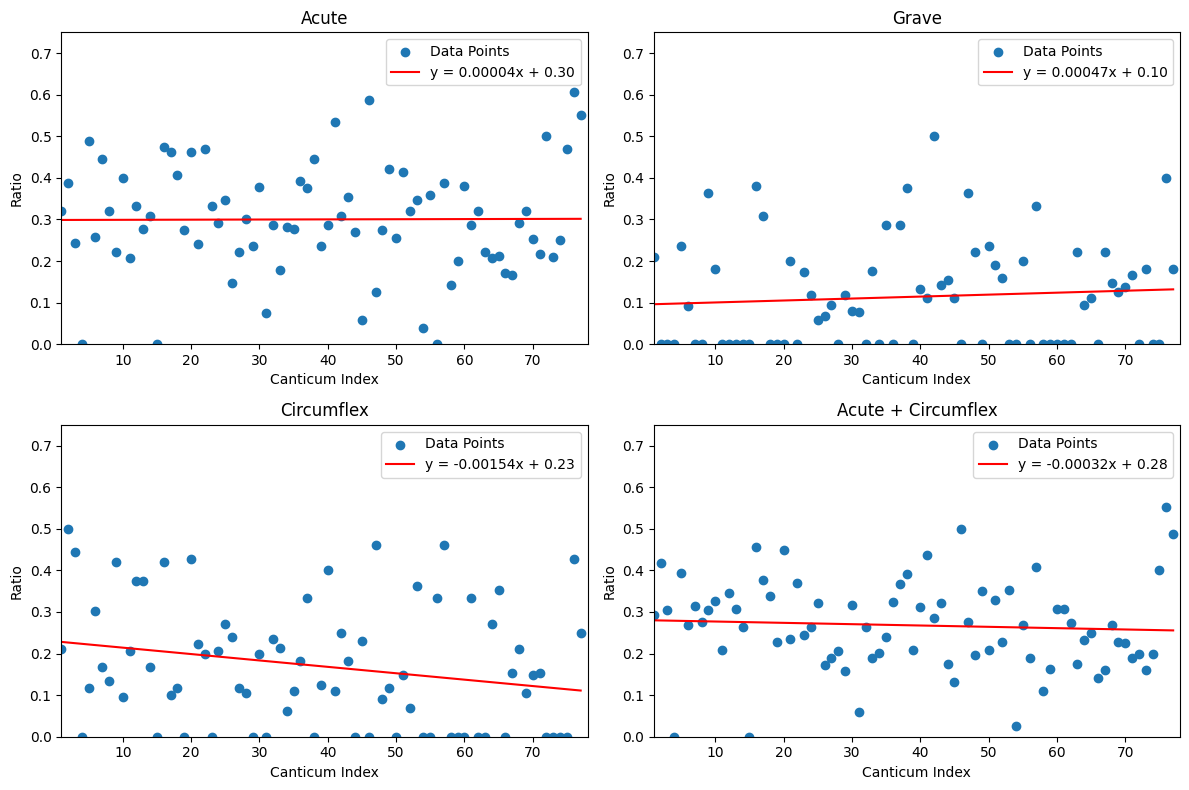

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
from lxml import etree
from tabulate import tabulate
from src.stats import accentually_responding_syllables_of_strophes_polystrophic, count_all_accents_canticum
from src.utils.utils import abbreviations, get_canticum_ids

def color_ratio(value):
    formatted = f"{value:.2f}"
    return f"\033[92m{formatted}\033[0m" if value > 0 else f"\033[91m{formatted}\033[0m"

canticum_ids = get_canticum_ids(abbreviations)
print(f"Number of cantica: {len(canticum_ids)}")
table_data = []

acute_ratios = []
grave_ratios = []
circumflex_ratios = []
pitch_ratios = []
labels = []

for idx, canticum in enumerate(canticum_ids):
    infix = canticum[:-2]
    xml_file = f"data/compiled/responsion_{infix}_compiled.xml"
    tree = etree.parse(xml_file)

    strophes = tree.xpath(f'//*[self::strophe or self::antistrophe][@responsion="{canticum}"]')
    accent_maps = accentually_responding_syllables_of_strophes_polystrophic(*strophes)

    total_accent_sums = count_all_accents_canticum(tree, canticum)
    accent_responsion_counts = {
        'acute': sum(len(d) for d in accent_maps[0]),
        'grave': sum(len(d) for d in accent_maps[1]),
        'circumflex': sum(len(d) for d in accent_maps[2])
    }

    acute_total = total_accent_sums['acute']
    grave_total = total_accent_sums['grave']
    circumflex_total = total_accent_sums['circumflex']

    acute_stat = accent_responsion_counts['acute'] / acute_total if acute_total > 0 else 0
    grave_stat = accent_responsion_counts['grave'] / grave_total if grave_total > 0 else 0
    circumflex_stat = accent_responsion_counts['circumflex'] / circumflex_total if circumflex_total > 0 else 0

    pitch_numerator = accent_responsion_counts['acute'] + accent_responsion_counts['circumflex']
    pitch_denominator = acute_total + circumflex_total
    pitch_stat = pitch_numerator / pitch_denominator if pitch_denominator > 0 else 0

    table_data.append([
        canticum,
        f"{accent_responsion_counts['acute']} / {acute_total} = {color_ratio(acute_stat)}",
        f"{accent_responsion_counts['grave']} / {grave_total} = {color_ratio(grave_stat)}",
        f"{accent_responsion_counts['circumflex']} / {circumflex_total} = {color_ratio(circumflex_stat)}",
        f"{pitch_numerator} / {pitch_denominator} = {color_ratio(pitch_stat)}"
    ])

    labels.append(canticum)
    acute_ratios.append(acute_stat)
    grave_ratios.append(grave_stat)
    circumflex_ratios.append(circumflex_stat)
    pitch_ratios.append(pitch_stat)

# Print the table
print(tabulate(
    table_data,
    headers=["Canticum", "Acute", "Grave", "Circumflex", "Acute + Circumflex"],
    tablefmt="github"
))

# Create plots with regression lines
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
titles = ["Acute", "Grave", "Circumflex", "Acute + Circumflex"]
data_lists = [acute_ratios, grave_ratios, circumflex_ratios, pitch_ratios]

x = list(range(len(labels)))

for i, (title, y_data) in enumerate(zip(titles, data_lists)):
    axs[i].scatter(x, y_data, label='Data Points')
    slope, intercept, r_value, _, _ = linregress(x, y_data)
    y_fit = [slope * xi + intercept for xi in x]
    axs[i].plot(x, y_fit, color='red', label=f"y = {slope:.5f}x + {intercept:.2f}")
    axs[i].set_title(title)
    axs[i].set_xlabel("Canticum Index")
    axs[i].set_ylabel("Ratio")
    axs[i].set_xlim(1, 78)
    axs[i].set_ylim(0, 0.75)
    axs[i].legend()

plt.tight_layout()
plt.show()

## Barys Responsion

The metric we're going for here is 

>**$n*β^r/β$** 

where $β^r$ is the number of barys + oxys responsion groups, $β$ is the number of all barys + oxys accents in all strophes and $n$ is the number of strophes. 

### Corpus

### Play

### Canticum

Here's a detailed print of all match groups of all cantica:

In [4]:
from lxml import etree

from src.stats_barys import barys_accentually_responding_syllables_of_strophes_polystrophic, count_all_barys_oxys_canticum

from src.utils.utils import abbreviations, get_canticum_ids, polystrophic_cantica

def barys_detailed_print(infix):

    input_file = f"data/compiled/responsion_{infix}_compiled.xml"
    tree = etree.parse(input_file)

    canticum_ids = get_canticum_ids([infix])

    for responsion in canticum_ids:
        print(f"\nCanticum: {responsion}")
            
        all_barys_oxys_canticum_dict = count_all_barys_oxys_canticum(tree, responsion)
        print(all_barys_oxys_canticum_dict)
        sum_barys = all_barys_oxys_canticum_dict['barys']
        sum_oxys = all_barys_oxys_canticum_dict['oxys']
        sum_barys_oxys = sum_barys + sum_oxys

        strophes = tree.xpath(f'//strophe[@responsion="{responsion}"] | //antistrophe[@responsion="{responsion}"]') # bug fix (was only strophe)
        n = len(strophes)

        barys_oxys_results = barys_accentually_responding_syllables_of_strophes_polystrophic(*strophes)

        if not barys_oxys_results:
            print("No valid barys/oxys matches found.\n")
            continue  # Skip to next responsion if no results

        barys_list, oxys_list = barys_oxys_results

        print(f"Barys matches: {len(barys_list)}")
        print(f"Oxys matches:  {len(oxys_list)}\n")

        barys_metric = (n * len(barys_list)) / sum_barys if sum_barys > 0 else 0
        oxys_metric = (n * len(oxys_list)) / sum_oxys if sum_oxys > 0 else 0
        barys_oxys_metric = (n * (len(barys_list) + len(oxys_list))) / sum_barys_oxys if sum_barys_oxys > 0 else 0

        print(f"Barys metric: {barys_metric:.3f}")
        print(f"Oxys metric:  {oxys_metric:.3f}")
        print(f"Barys + Oxys metric: {barys_oxys_metric:.3f}\n")

        if responsion in polystrophic_cantica:
            if barys_list:
                print("--- BARYS MATCHES ---")
                for match_idx, match_set in enumerate(barys_list, start=1):
                    print(f"  Match #{match_idx}:")
                    for (line_id, unit_ord), text in match_set.items():
                        print(f"    (line {line_id}, ord={unit_ord}) => \"{text}\"")
                    print()

            if oxys_list:
                print("--- OXYS MATCHES ---")
                for match_idx, match_set in enumerate(oxys_list, start=1):
                    print(f"  Match #{match_idx}:")
                    for (line_id, unit_ord), text in match_set.items():
                        print(f"    (line {line_id}, ord={unit_ord}) => \"{text}\"")
                    print()
            
        else: 
            if barys_list:
                print("--- BARYS MATCHES ---")
                for i, pair_dict in enumerate(barys_list, start=1):
                    print(f"  Pair #{i}:")
                    for (line_id, unit_ord), text in pair_dict.items():
                        print(f"    (line {line_id}, ord={unit_ord}) => \"{text}\"")
                    print()

            if oxys_list:
                print("--- OXYS MATCHES ---")
                for i, pair_dict in enumerate(oxys_list, start=1):
                    print(f"  Pair #{i}:")
                    for (line_id, unit_ord), text in pair_dict.items():
                        print(f"    (line {line_id}, ord={unit_ord}) => \"{text}\"")
                    print()

for infix in abbreviations:
    barys_detailed_print(infix)


Canticum: ach01
{'barys': 67, 'oxys': 26}
Barys matches: 15
Oxys matches:  2

Barys metric: 0.448
Oxys metric:  0.154
Barys + Oxys metric: 0.366

--- BARYS MATCHES ---
  Pair #1:
    (line 204, ord=1) => "Τῇ"
    (line 219, ord=1) => "Νῦν"

  Pair #2:
    (line 205, ord=8) => "πάντων"
    (line 220, ord=8) => "τείδῃ"

  Pair #3:
    (line 205, ord=11) => "πόλει"
    (line 220, ord=11) => "κέλος"

  Pair #4:
    (line 206, ord=7) => "τοῦ"
    (line 221, ord=7) => "τέος"

  Pair #5:
    (line 207, ord=3) => "οἶ"
    (line 222, ord=3) => "δέπερ"

  Pair #6:
    (line 207, ord=5) => "δ' ὅποι"
    (line 222, ord=5) => "γέρον"

  Pair #7:
    (line 207, ord=15) => "φέρων"
    (line 222, ord=15) => "νέας"

  Pair #8:
    (line 208-209, ord=3) => "πέφευγ"
    (line 223-224, ord=3) => "ς, ὦ Ζ"

  Pair #9:
    (line 210-211, ord=4) => "ς. Οἴμοι"
    (line 225, ord=4) => "τοῖ"

  Pair #10:
    (line 210-211, ord=7) => "τῶν"
    (line 225, ord=7) => "θροῖ"

  Pair #11:
    (line 211-212, ord=4) =

{'ach01': {'barys_metric': 0.44776119402985076, 'oxys_metric': 0.15384615384615385, 'barys_oxys_metric': 0.3655913978494624}, 'ach02': {'barys_metric': 0.43137254901960786, 'oxys_metric': 0.37037037037037035, 'barys_oxys_metric': 0.41025641025641024}, 'ach03': {'barys_metric': 0.6428571428571429, 'oxys_metric': 0.15384615384615385, 'barys_oxys_metric': 0.4878048780487805}, 'ach04': {'barys_metric': 0.5882352941176471, 'oxys_metric': 0.24, 'barys_oxys_metric': 0.4406779661016949}, 'ach05': {'barys_metric': 0.10256410256410256, 'oxys_metric': 0.0, 'barys_oxys_metric': 0.08888888888888889}, 'ach06': {'barys_metric': 0.5263157894736842, 'oxys_metric': 0.2222222222222222, 'barys_oxys_metric': 0.48484848484848486}, 'ach07': {'barys_metric': 0.42857142857142855, 'oxys_metric': 0.17391304347826086, 'barys_oxys_metric': 0.302158273381295}, 'ach08': {'barys_metric': 0.43478260869565216, 'oxys_metric': 0.0, 'barys_oxys_metric': 0.4}, 'ach09': {'barys_metric': 0.35294117647058826, 'oxys_metric': 0

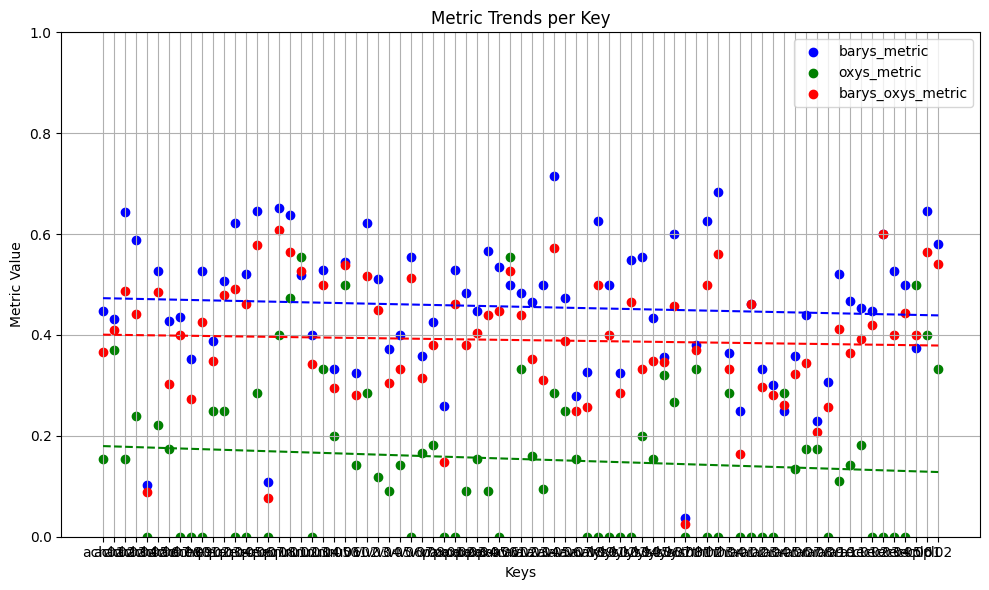

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

from src.stats_barys import barys_oxys_metric_canticum
from src.utils.utils import abbreviations, get_canticum_ids

canticum_ids = get_canticum_ids(abbreviations)

canticum_dict = {}
for canticum in canticum_ids:
    canticum_dict[canticum] = barys_oxys_metric_canticum(canticum) 

print(canticum_dict)

data = canticum_dict

# Prepare
x_labels = list(data.keys())
x_numeric = np.arange(len(x_labels))  # [0, 1, 2, ...]

# Extract y-values
barys = [data[k]['barys_metric'] for k in x_labels]
oxys = [data[k]['oxys_metric'] for k in x_labels]
barys_oxys = [data[k]['barys_oxys_metric'] for k in x_labels]

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(x_numeric, barys, color='blue', label='barys_metric')
plt.scatter(x_numeric, oxys, color='green', label='oxys_metric')
plt.scatter(x_numeric, barys_oxys, color='red', label='barys_oxys_metric')

# Linear regression function
def plot_regression(x, y, color):
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    plt.plot(x, y_pred, color=color, linestyle='--')

# Fit and plot regression lines
plot_regression(x_numeric, np.array(barys), 'blue')
plot_regression(x_numeric, np.array(oxys), 'green')
plot_regression(x_numeric, np.array(barys_oxys), 'red')

# Finalize plot
plt.xticks(ticks=x_numeric, labels=x_labels)
plt.ylim(0, 1)
plt.xlabel("Keys")
plt.ylabel("Metric Value")
plt.title("Metric Trends per Key")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Relationship Between the 3 Metrics

## Significance